# Jonathan Halverson
# Saturday, April 9, 2016
# Wine data with logistic regression and L1 norm

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [68]:
columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
           'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', \
           'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('wine.csv', names=columns)
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [70]:
df.describe().applymap(lambda x: round(x, 1))

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,1.9,13.0,2.3,2.4,19.5,99.7,2.3,2.0,0.4,1.6,5.1,1.0,2.6,746.9
std,0.8,0.8,1.1,0.3,3.3,14.3,0.6,1.0,0.1,0.6,2.3,0.2,0.7,314.9
min,1.0,11.0,0.7,1.4,10.6,70.0,1.0,0.3,0.1,0.4,1.3,0.5,1.3,278.0
25%,1.0,12.4,1.6,2.2,17.2,88.0,1.7,1.2,0.3,1.3,3.2,0.8,1.9,500.5
50%,2.0,13.1,1.9,2.4,19.5,98.0,2.4,2.1,0.3,1.6,4.7,1.0,2.8,673.5
75%,3.0,13.7,3.1,2.6,21.5,107.0,2.8,2.9,0.4,1.9,6.2,1.1,3.2,985.0
max,3.0,14.8,5.8,3.2,30.0,162.0,3.9,5.1,0.7,3.6,13.0,1.7,4.0,1680.0


### Correlation

In [71]:
df.corr().applymap(lambda x: round(x, 2))

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
class,1.00,-0.33,0.44,-0.05,0.52,-0.21,-0.72,-0.85,0.49,-0.50,0.27,-0.62,-0.79,-0.63
Alcohol,-0.33,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64
Malic acid,0.44,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
Ash,-0.05,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22
Alcalinity of ash,0.52,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44
Magnesium,-0.21,0.27,-0.05,0.29,-0.08,1.00,0.21,0.20,-0.26,0.24,0.20,0.06,0.07,0.39
Total phenols,-0.72,0.29,-0.34,0.13,-0.32,0.21,1.00,0.86,-0.45,0.61,-0.06,0.43,0.70,0.50
Flavanoids,-0.85,0.24,-0.41,0.12,-0.35,0.20,0.86,1.00,-0.54,0.65,-0.17,0.54,0.79,0.49
Nonflavanoid phenols,0.49,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1.00,-0.37,0.14,-0.26,-0.50,-0.31
Proanthocyanins,-0.50,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33


In [101]:
np.sort(np.unique(np.abs(df.ix[:,1:].corr().values.ravel())))[-5:]

array([ 0.65269177,  0.69994936,  0.7871939 ,  0.8645635 ,  1.        ])

The description of the data says that there are no null values. This is found to be true. The data set is clean. We note that the largest value of the correlation 0.86.

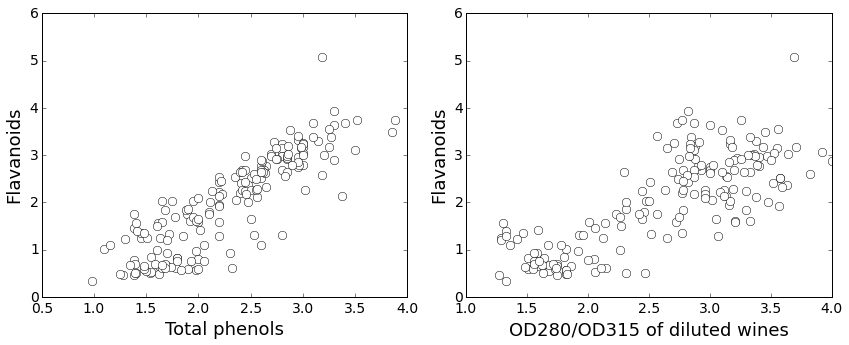

In [80]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax0.plot(df['Total phenols'], df['Flavanoids'], 'wo')
ax0.set_xlabel('Total phenols')
ax0.set_ylabel('Flavanoids')
ax1.plot(df['OD280/OD315 of diluted wines'], df['Flavanoids'], 'wo')
ax1.set_xlabel('OD280/OD315 of diluted wines')
ax1.set_ylabel('Flavanoids')
plt.tight_layout()

### Data preparation

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.ix[:,1:].values, df['class'].values)

We see that the values vary substantially so we will standardize all columns:

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Machine learning model 

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1, penalty='l1', multi_class='ovr')
lr.fit(X_train_std, y_train)
print(lr.score(X_train_std, y_train))
print(lr.score(X_test_std, y_test))

0.984962406015
0.955555555556


The C parameter is the inverse of the regularization parameter $\lambda$, which the sets the relative weight because the sum of the squares and the sum of the coefficients.

In [89]:
lr.intercept_

array([-0.32055202, -0.21678098, -0.80630304])

In [90]:
lr.coef_

array([[ 0.37909965,  0.        ,  0.        , -0.14640118,  0.        ,
         0.        ,  0.5416148 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.11137637,  1.29599079],
       [-0.90326427, -0.02807004,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.7033636 ,
         0.29886263,  0.        , -0.4500602 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.67003907,  0.        ,  0.        ,  0.48039035,
        -0.56212232, -0.50054138,  0.        ]])

We see that the L1 norm penalty has driven many of the coefficients to zero.

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.977777777778


In [103]:
rf.feature_importances_

array([ 0.13814536,  0.0311407 ,  0.01132226,  0.02419452,  0.02848385,
        0.05348618,  0.14021672,  0.01466386,  0.02129719,  0.13981938,
        0.09744771,  0.13471481,  0.16506745])

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)
knn.score(X_test_std, y_test)

0.9555555555555556